<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center>Modelo Logístico</center></span>

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [El modelo lineal de clasificación](#El-modelo-lineal-de-clasificación)
* [Importar los módulos requeridos](#Importar-los-módulos-requeridos)
* [Carga del conjunto de datos Iris](#Carga-del-conjunto-de-datos-Iris)
* [Acercamiento descriptivo a los datos](#Acercamiento-descriptivo-a-los-datos)
* [Separa features y targets](#Separa-features-y-targets)
* [Divide los datos: entrenamiento y validación](#Divide-los-datos:-entrenamiento-y-validación)
* [Normaliza los datos](#Normaliza-los-datos)
* [Entrenamiento del Modelo](#Entrenamiento-del-Modelo)
* [Predicciones](#Predicciones)
* [Validación](#Validación)


## <span style="color:blue">Introducción</span>

Este código fue tomado y  adaptado de [Google Colab](https://colab.research.google.com/drive/1qNxKmi0QpkunqTDdpXfVLlneG-NFDN9c). En este ejercicio usaremos el famoso conjunto de datos *iris*. Sin embargo no se usaran todos los datos, porque en este ejercicio vamos a introducir el modelo logístico clásico que permite separar en dos clases. Los datos de la primera clase son omitidos y los datos se recodifican para tener solamente dos clases. Próximamente usaremos todos los datos.

## <span style="color:blue">El modelo lineal de clasificación</span>

En este  modelo se tienen varias variables regresoras o explicativas de entrada y una variable dicotómica de salida.

El propósito central es construir un modelo para predecir la probabilidad de que los elementos del espacio de entrada pertenezcan a una de dos clases, las cuales denotaremos como 0 y 1 respectivamente.

Supongamos que tenemos dos variables $X_1$ y $X_2$ que se espera permitan predecir si un elemento del conjunto de entrada pertenece a una clase: clase 1 ($Y=1$) o clase 0 ($Y=0$).

El modelo desde el punto de vista estadístico se escribe como

$$
[Y_i|X_1=x_{i1},X_2=x_{i2}] \sim \text{Bernoulli}(\pi_i),
$$

en donde 

$$
\pi_i = \frac{1}{1 + exp(-[b +w_1x_{i1} + w_2x_{i2})]}, i =i,\cdots,N
$$

En el entrenamiento se encontraran los pesos $w_1,w_2,$ y el intercepto $b$ que minimizan una determinada función de pérdida, a partir de un conjunto de datos de entrenamiento. 


Una vez garantizado que la máquina generaliza bien, probando con los datos de validación, la expresión anterior se utiliza para predecir la probabilidad que un nuevo valor no observado en el espacio de entrada, digamos $(x_1,x_2)$ pertenezca a a una clase. 

Por construcción $\pi$ es la probabilidad que el elemento $x$ pertenezca a la clase 1. Por lo tanto si por ejemplo $\pi = 0.8$ para un elemento, entonces lo clasificamos en la clase 1. 


La idea central que está detrás de este tipo de modelos se puede apreciar en la siguiente imagen.

<figure>
<center>
<img src="../Imagenes/clasificador_lineal.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Clasificador Lineal</p>
</figcaption>
</figure>

Se trata de un clasificador lineal simple. Vamos a suponer que la máquina de aprendizaje ya está entrenada, por lo que los parámetros $w,b$ están fijos.

Observe que la línea roja divide el espacio $\mathcal{R}^2$ en  tres regiones. La primera es justamente la recta, que corresponde a un modelo de regresión como se estudió en la lección de [regresión lineal](am_intro_regresion.ipynb). Sobre la línea se cumple la ecuación 

$$
wx+b =0.
$$

Por otro lado se tiene que si $wx+b=0$, entonces la probabilidad $\pi$ es dada en este caso por

$$
\pi = \frac{1}{1+exp(-(wx+b))} = \frac{1}{2}.
$$

La segunda región está a la derecha. Usted puede verificar que en este caso, para todos los valores de $x$ se tiene que  $wx+b>0$. Como consecuencia, se tiene que $\pi>\tfrac{1}{2}$. en el caso extremo para valores $x$ muy alejados hacia la derecha, se tiene que $wx+b\to \infty$ y en consecuencia $\pi\to 1$.


En la tercera región (a la izquierda) ocurre el comportamiento simétrico pero en el otro sentido. Ahora $wx+b<0$, para todos los valores de $x$.  Se tiene que $\pi<\tfrac{1}{2}$. En el caso extremo para valores $x$ muy alejados hacia la izquierda, se tiene que $wx+b\to -\infty$ y en consecuencia $\pi\to 0$.


### Conclusión

El separador lineal funciona de la siguiente forma en este caso.

1. Si $\pi(x)$ es mayor que 0.5, la clase que debe asigna es 1. Entre mayor es $\pi(x)$ mayor tranquilidad para asignar la clase 1 al elemento $x$ en el espacio se entrada.
2. Si $\pi(x)$ es menor que 0.5, la clase que debe asigna es 0. Entre mayor es $\pi(x)$ mayor tranquilidad para asignar la clase 0 al elemento $x$ en el espacio se entrada.
3. Si $\pi(x)=0.5$, no se puede asignar una clase. Para valores muy cercanos a 0.5, no se debe asignar una clase directamente. Si fuera necesario tomar una decisión, lo mejor es seleccionar la clase de forma aleatoria. Como regla de combate, si $0.48 \le \pi(x)\le 0.52$, seleccionar aleatoriamente.

## <span style="color:blue">Importar los módulos requeridos</span>

In [1]:
#importing alll the necessary packages to Logistic Regression 
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sb

## <span style="color:blue">Carga del conjunto de datos Iris</span>

In [30]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target

In [3]:
# Definición de nombres de columnas y dimensiones objetivo
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['0', '1', '2']

# Crear un DataFrame de Pandas con los datos
iris_df = pd.DataFrame(data=X, columns=col_names[:-1])  # Excluimos 'Species'
iris_df['Species'] = Y  # Agregamos la columna 'Species'

# Mapear los valores de 'Species' a las dimensiones objetivo
iris_df['Species'] = iris_df['Species'].map({0: target_dimensions[0], 1: target_dimensions[1], 2: target_dimensions[2]})

In [4]:
species_mapping = {"0": 0, "1": 1, "2": 2}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

In [5]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
train_df, test_df = train_test_split(iris_df, test_size=30, train_size=120, stratify=iris_df['Species'], random_state=42)

In [6]:
# esta sección es para omitir la clase 0: "Setosa" y recodificar loa datos  de entrenamiento
train_df = train_df[train_df['Species'] >= 1]
#training['Species'] = training['Species'].replace([1,2], [0,1])
train_df['Species'].replace(to_replace=[1,2], value=[0,1], inplace=True)

# esta sección es para omitir la clase 0: "Setosa" y recodificar los datos  de validación
test_df = test_df[test_df['Species'] >= 1]
#test['Species'] = test['Species'].replace([1,2], [0,1])
test_df['Species'].replace(to_replace=[1,2], value=[0,1], inplace=True)

In [7]:
# omite los índices de los dos dataframes para poderlos concadenar
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# concadena los dataframes
iris_dataframe = pd.concat([train_df, test_df], axis=0)

In [8]:
iris_dataframe

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,2.5,4.5,1.7,1
1,6.8,2.8,4.8,1.4,0
2,5.5,2.5,4.0,1.3,0
3,6.3,2.5,5.0,1.9,1
4,5.6,2.7,4.2,1.3,0
...,...,...,...,...,...
15,6.1,2.6,5.6,1.4,1
16,6.4,2.8,5.6,2.2,1
17,6.7,3.0,5.0,1.7,0
18,6.6,3.0,4.4,1.4,0


In [9]:
iris_dataframe.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,  0,  1,  2,  3,  4,
             5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
           dtype='int64')

## <span style="color:blue">Acercamiento descriptivo a los datos</span>

In [32]:
iris_dataframe.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


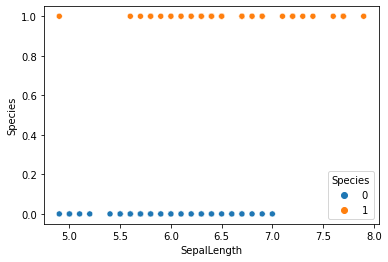

In [36]:
sb.scatterplot(x='SepalLength', y='Species', hue='Species', data=iris_dataframe)
plt.show()

In [ ]:
sb.pairplot(iris_dataframe, diag_kind="kde")
plt.show()

In [ ]:
correlation_data = iris_dataframe.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

## <span style="color:blue">Separa features y targets</span>

In [11]:
X_data = iris_dataframe[[m for m in iris_dataframe.columns if m not in ['Species']]]
Y_data = iris_dataframe[['Species']]

In [12]:
X_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,4.9,2.5,4.5,1.7
1,6.8,2.8,4.8,1.4
2,5.5,2.5,4.0,1.3
3,6.3,2.5,5.0,1.9
4,5.6,2.7,4.2,1.3
...,...,...,...,...
15,6.1,2.6,5.6,1.4
16,6.4,2.8,5.6,2.2
17,6.7,3.0,5.0,1.7
18,6.6,3.0,4.4,1.4


## <span style="color:blue">Divide los datos: entrenamiento y validación</span>

In [13]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [14]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [29]:
stats = training_features.describe()
stats

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,80.00000,80.000000,80.00000,80.000000
mean,6.22375,2.857500,4.86625,1.648750
std,0.66945,0.344496,0.83650,0.422468
min,4.90000,2.000000,3.00000,1.000000
25%,5.70000,2.675000,4.27500,1.300000
50%,6.15000,2.900000,4.80000,1.500000
75%,6.70000,3.000000,5.60000,2.000000
max,7.90000,3.800000,6.70000,2.500000


In [28]:
stats = test_features.describe()
stats

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,20.000000,20.000000,20.000000,20.000000
mean,6.415000,2.930000,5.065000,1.785000
std,0.628511,0.281163,0.780199,0.427077
min,4.900000,2.400000,3.300000,1.000000
25%,6.150000,2.700000,4.600000,1.500000
50%,6.500000,3.000000,5.150000,1.850000
75%,6.700000,3.100000,5.425000,2.150000
max,7.700000,3.400000,6.900000,2.300000


## <span style="color:blue">Normaliza los datos</span>

In [17]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [18]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for checking the model accuracy

## <span style="color:blue">Entrenamiento del Modelo</span>

In [19]:
log = LogisticRegression()
log.fit(training_features, training_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## <span style="color:blue">Predicciones</span>

In [20]:
train_predictions_series = log.predict(training_features)
test_predictions_series = log.predict(test_features)

In [21]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [22]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

In [23]:
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

## <span style="color:blue">Validación</span>

In [24]:
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

- **accuracy_score**: En la clasificación con múltiples etiquetas, esta función calcula la precisión del subconjunto: el conjunto de etiquetas predichas para una muestra que coincide exactamente con el conjunto de etiquetas correspondiente en y_true.
- **precision_score**: es la razón $\frac{tp }{tp + fp}$ en donde $tp$ es el número de positivos verdadero y $fp$ el número de falsos positivos. El mejor valor es 1 y el peor valor es 0.
- **recall_score**:  es la relación $\frac{tp }{tp + fn}$ donde $tp$ es el número de verdaderos positivos y $fn$ el número de falsos negativos. El recuerdo es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es 1 y el peor valor es 0.

In [25]:
train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  95.0
Training Data Precision (%) =  97.14
Training Data Recall (%) =  91.89
--------------------------------------------------
Test Data Accuracy (%) =  100.0
Test Data Precision (%) =  100.0
Test Data Recall (%) =  100.0


In [26]:
train_predictions_series

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [27]:
train_predictions_df 

,predictions
0,0
1,1
2,0
3,0
4,0
...,...
75,1
76,0
77,1
78,1


-[Regresar al inicio](#Contenido)